# Imports 

In [2]:
import pandas as pd
import numpy as np

# import matplotlib.pyplot and seaborn for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

import os
from math import ceil

from scipy import stats

# Data Set Information:
**customer_id** - Unique identifier for each customer.

**customer_region** - Geographic region where the customer is located.

**customer_age** - Age of the customer.

**vendor_count** - Number of unique vendors the customer has ordered from.

**product_count** - Total number of products the customer has ordered.

**is_chain** - Indicates whether the customer’s order was from a chain restaurant.

**first_order** - Number of days from the start of the dataset when the customer first placed an order.

**last_order** - Number of days from the start of the dataset when the customer most recently placed an order.

**last_promo** - The category of the promotion or discount most recently used by the customer.

**payment_method** - Method most recently used by the customer to pay for their orders.

**CUI_American, CUI_Asian, CUI_Chinese, CUI_Italian, etc.** - The amount in monetary units spent by the customer from the indicated type of cuisine.

**DOW_0toDOW_6** - Number of orders placed on each day of the week (0 =Sunday, 6 =Saturday).

**HR_0toHR_23** - Number of orders placed during each hour of the day (0 =midnight, 23 = 11 PM).

In [3]:
df = pd.read_csv('DM2425_ABCDEats_DATASET.csv', sep=',')
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31888 entries, 0 to 31887
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               31888 non-null  object 
 1   customer_region           31888 non-null  object 
 2   customer_age              31161 non-null  float64
 3   vendor_count              31888 non-null  int64  
 4   product_count             31888 non-null  int64  
 5   is_chain                  31888 non-null  int64  
 6   first_order               31782 non-null  float64
 7   last_order                31888 non-null  int64  
 8   last_promo                31888 non-null  object 
 9   payment_method            31888 non-null  object 
 10  CUI_American              31888 non-null  float64
 11  CUI_Asian                 31888 non-null  float64
 12  CUI_Beverages             31888 non-null  float64
 13  CUI_Cafe                  31888 non-null  float64
 14  CUI_Ch

In [5]:
df.isna().sum()

customer_id                    0
customer_region                0
customer_age                 727
vendor_count                   0
product_count                  0
is_chain                       0
first_order                  106
last_order                     0
last_promo                     0
payment_method                 0
CUI_American                   0
CUI_Asian                      0
CUI_Beverages                  0
CUI_Cafe                       0
CUI_Chicken Dishes             0
CUI_Chinese                    0
CUI_Desserts                   0
CUI_Healthy                    0
CUI_Indian                     0
CUI_Italian                    0
CUI_Japanese                   0
CUI_Noodle Dishes              0
CUI_OTHER                      0
CUI_Street Food / Snacks       0
CUI_Thai                       0
DOW_0                          0
DOW_1                          0
DOW_2                          0
DOW_3                          0
DOW_4                          0
DOW_5     

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.describe()

,customer_age,vendor_count,product_count,is_chain,first_order,last_order,CUI_American,CUI_Asian,CUI_Beverages,CUI_Cafe,CUI_Chicken Dishes,CUI_Chinese,CUI_Desserts,CUI_Healthy,CUI_Indian,CUI_Italian,CUI_Japanese,CUI_Noodle Dishes,CUI_OTHER,CUI_Street Food / Snacks,CUI_Thai,DOW_0,DOW_1,DOW_2,DOW_3,DOW_4,DOW_5,DOW_6,HR_0,HR_1,HR_2,HR_3,HR_4,HR_5,HR_6,HR_7,HR_8,HR_9,HR_10,HR_11,HR_12,HR_13,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
count,31161.000000,31888.000000,31888.000000,31888.000000,31782.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,30723.0,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.0000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000,31888.000000
mean,27.506499,3.102609,5.668245,2.818866,28.478604,63.675521,4.880438,9.960451,2.300633,0.801163,0.768096,1.431218,0.884359,0.950203,1.631153,3.233411,2.995379,0.711676,2.999913,3.913253,0.841697,0.555914,0.567486,0.591006,0.619449,0.677747,0.652973,0.704246,0.0,0.053845,0.063190,0.118759,0.101700,0.081943,0.069681,0.0768,0.131899,0.233912,0.329560,0.378167,0.314162,0.236453,0.215630,0.277032,0.356435,0.390962,0.336961,0.245610,0.142812,0.071155,0.048263,0.045189
std,7.160898,2.771587,6.957287,3.977529,24.109086,23.226123,11.654018,23.564351,8.479734,6.427132,3.657273,8.191755,5.259868,5.830590,7.443234,11.247990,10.180851,4.536457,9.768300,15.548507,4.433047,1.013601,1.044090,1.045907,1.069672,1.088122,1.069947,1.167446,0.0,0.317013,0.351498,0.500862,0.437493,0.358705,0.329461,0.3777,0.635582,0.724906,0.891161,0.959961,0.842484,0.637502,0.599006,0.738162,0.874449,0.943721,0.893949,0.795296,0.586529,0.348536,0.298265,0.282006
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,1.000000,2.000000,1.000000,7.000000,49.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,2.000000,3.000000,2.000000,22.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,31.000000,4.000000,7.000000,3.000000,45.000000,83.000000,5.660000,11.830000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,80.000000,41.000000,269.000000,83.000000,90.000000,90.000000,

### Remarks
- HR_0 only has 0 values, thus **drop the feature**
- HR_11 & HR_17 representing 11am and 5pm, respectively, are the hours of the day when, on average, consumers order more
- HR_22 to HR_1 representing 10pm to 1am, are the hours of the day when, on average, consumers order less<br/>
<br/>
- DOW_4 & DOW_6 representing Thursday and Saturday, are the days of the week when, on average, consumers order more
- DOW_0 & DOW_1 representing Sunday and Mondauy, are the days of the week when, on average, consumers order less<br/>
<br/>
**Missing values**: The variables "customer_age", "first_order" and " HR_0" have missing values<br/>
For all rows with missing values in "first_order", the corresponding value in the feature "last_order" is 0, meaning **the customer didn't place an order during the data collection period**.


In [7]:
# group the data by similarity
orders_per_hour= df.loc[:, 'HR_0':'HR_23']

dawn = sum(df.loc[:, 'HR_0':'HR_6'].sum())
morning= sum(df.loc[:, 'HR_7':'HR_12'].sum())
afternoon = sum(df.loc[:, 'HR_13':'HR_18'].sum())
night = sum(df.loc[:, 'HR_19':'HR_23'].sum())

orders_per_moment_of_day = [dawn, morning, afternoon, night]


orders_per_dow = df.loc[:, 'DOW_0':'DOW_6']
orders_per_dow_sum = orders_per_dow.sum()

orders_per_cuisine = df.loc[:, 'CUI_American':'CUI_Thai']
orders_per_cuisine_sum = orders_per_cuisine.sum()

In [8]:
# split data metric and non metric
df_non_metric = df.select_dtypes(include=['object'])
df_metric = df.select_dtypes(include=['int64', 'float64'])

In [9]:
###################### df.set_index

# Metric Data

In [10]:
# split data into metric and non-metric
metric_features = df.columns.drop(df_non_metric.columns).drop(orders_per_dow).drop(orders_per_cuisine).drop(orders_per_hour).to_list()

print(metric_features)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order']


## Metric Data Histogram

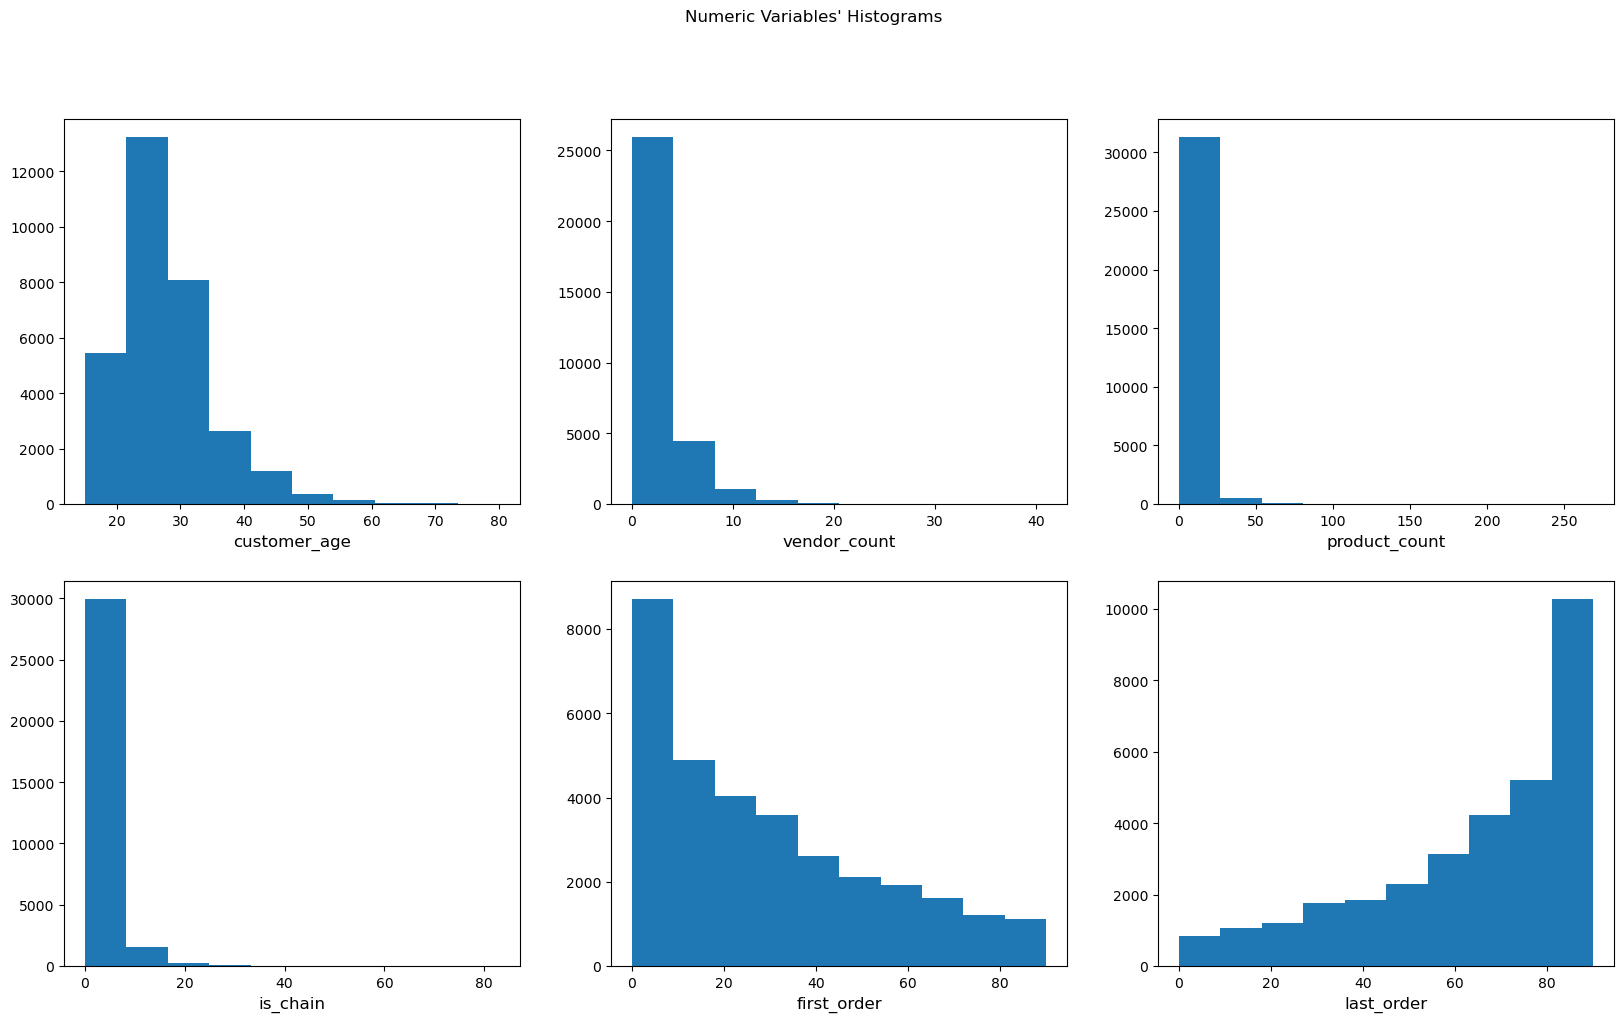

In [11]:
sp_rows = 2
sp_cols = 3

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

for ax, feat in zip(axes.flatten(), metric_features): # Notice the zip() function and flatten() method - creates one list with all the axes
    ax.hist(df[feat])
    ax.set_title(feat, y=-0.13)

title = "Numeric Variables' Histograms"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))
    
plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_histograms.png'), dpi=200)

plt.show()

### Histogram - Remarks

- By visualizing their histograms, the features *first_order* and *last_order* seem to be **correlated**, due to their plots' symmetry. <br/>
- The features *vendor_count*,*product_count* and *is_chain* seem to have **outliers that limit the visualization** of their distribution.<br/> 
- The feature *customer_age* might have some less accentuated outliers, but seems to have a **right-skewed distribution** - meaning that customers show a tendency to young adults. (and it does make logical sense, since we are analyzing data from a online app)

## Metric Data Boxplot

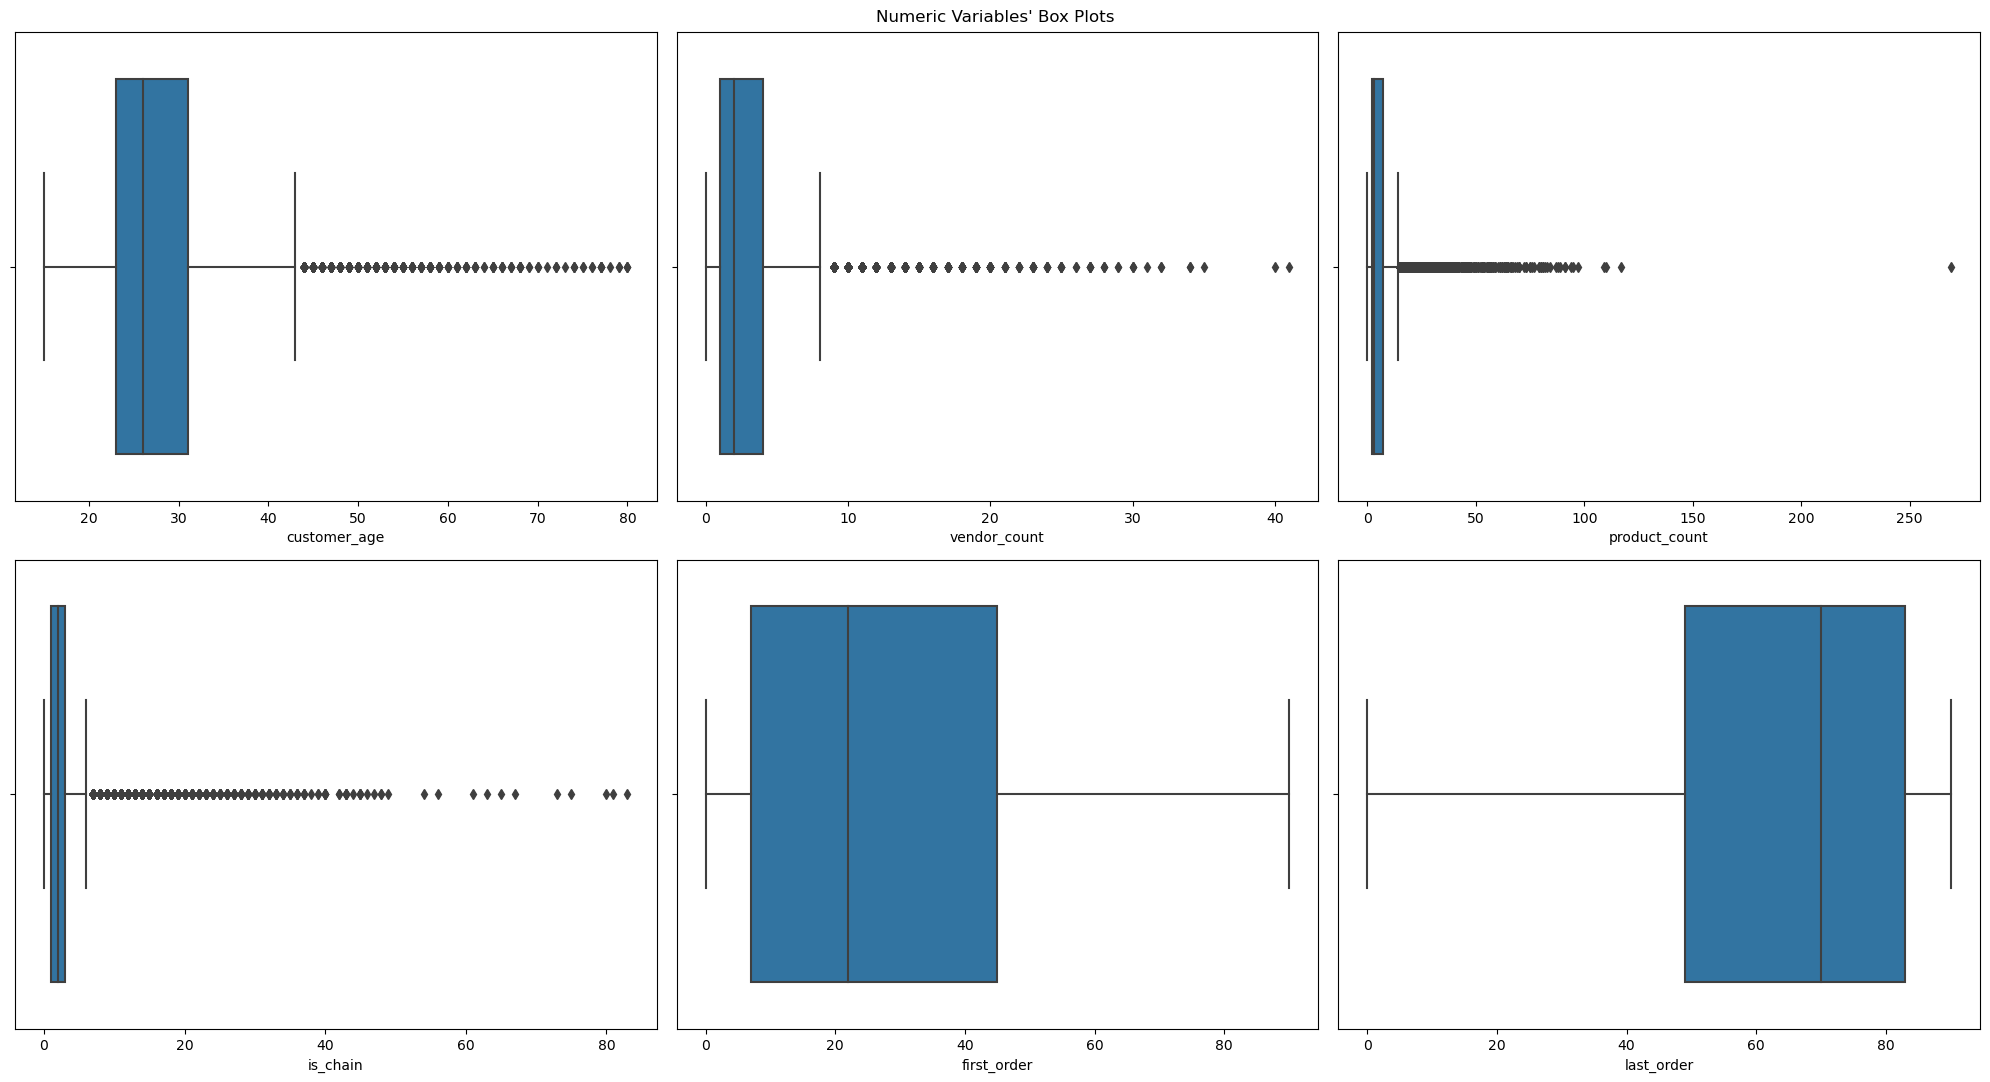

In [12]:
sp_rows = 2
sp_cols = ceil(len(metric_features) / sp_rows)


fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )


for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax)
    
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

if not os.path.exists(os.path.join('..', 'figures', 'eda')):
    os.makedirs(os.path.join('..', 'figures', 'eda'))


plt.savefig(os.path.join('..', 'figures', 'eda', 'numeric_variables_boxplots.png'), dpi=200)


plt.show()

### Boxplot - Remarks

- Once again, the features *first_order* and *last_order* have highly symmetrical plots, which might indicate **correlation** between them. <br/>
- As suspected, the features *vendor_count*,*product_count* and *is_chain* have a **elevated number of outliers**, that should be dealt with in order to visualize the features distribution. <br/>
- (WHAT SHOULD WE DO WITH THE OUTLIERS OF CUSTOMER AGE- by taking them off we might be biasing the data)

## Metric Data Correlation Matrix

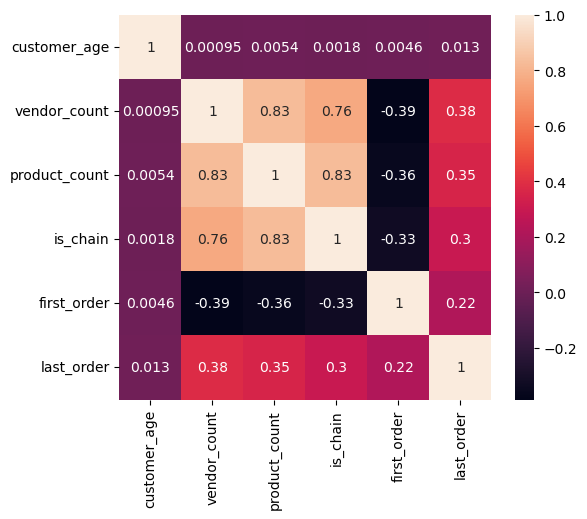

In [13]:
ig = plt.figure(figsize=(6, 5))

corr = df[metric_features].corr(method="pearson")

sns.heatmap(data=corr, annot=True)


plt.show()

### Correlation Matrix - Remarks
- The feature *product_count* is highly correlated to *vendor_count* and *is_chain*, thus it is a good candidate to be dropped from the dataset. <br/>
- Depending on the redundancy treeshold considered, *vendour_count* and *is_chain* can be also considered highly correlated. If the treeshold considered is bellow to 0.76, one of the named features would be dropped from the dataset.

## Days of the Week 

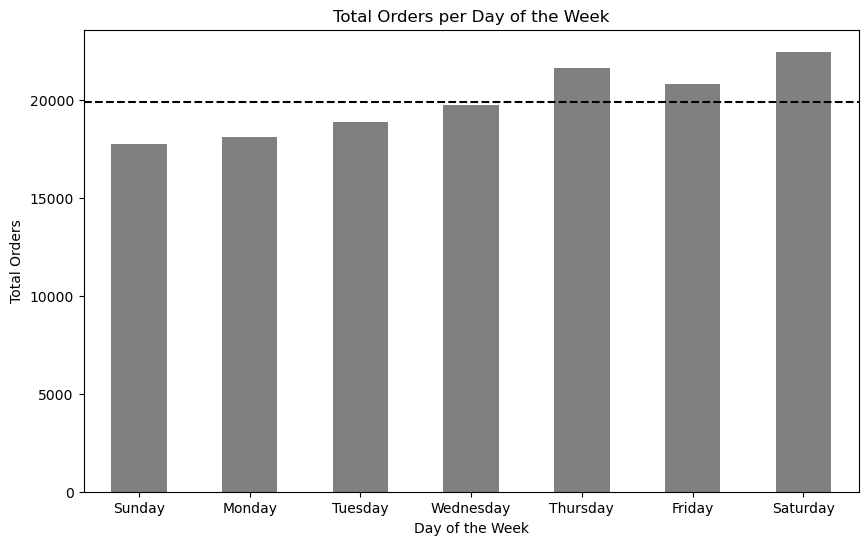

In [14]:
##################### copiei tudo do chatgpt ####################
average_orders_dow = orders_per_dow_sum.mean()
list_day_of_week = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

plt.figure(figsize=(10, 6))
orders_per_dow_sum.plot(kind='bar', color = 'grey')
plt.xticks(ticks=range(len(list_day_of_week)), labels=list_day_of_week, rotation=0)
plt.axhline(y=average_orders_dow, color='black', linestyle='--', label='Average Orders')
plt.title('Total Orders per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.show()



### Days of the Week - Remarks
- The total number of orders per day of the week does not have a high disparity, as we can observe in the graph.
- We decided to compare it to the mean, approximely 19902 orders per day of the week. This comparison allows us to identify days that fall below it and those that meet or exceed it.
- For example, from Thursday to Saturday, the number of orders exceeds the average, while the rest of the days fall bellow it. Unexpectedly, Sunday has the lowest order count of the week.

## Hours of the day

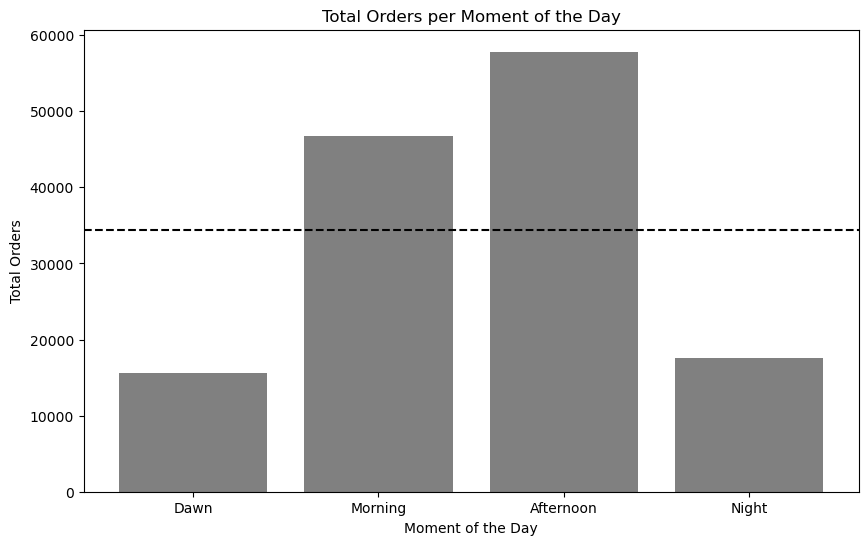

In [15]:
moments_of_day = ['Dawn', 'Morning', 'Afternoon', 'Night']
average_orders_moment = sum(orders_per_moment_of_day)/len(orders_per_moment_of_day)

plt.figure(figsize=(10, 6))
plt.bar(moments_of_day, orders_per_moment_of_day, color='grey')
plt.axhline(y=average_orders_moment, color='black', linestyle='--', label='Average Orders')
plt.title('Total Orders per Moment of the Day')
plt.xlabel('Moment of the Day')
plt.ylabel('Total Orders')
plt.xticks(rotation=0)
plt.show()

### Moments of the Day - Remarks
- Once again we used the average to compared with the different moments of the day.
- With a mean of the orders is 34440 per moment of the day, both morning and afternoon show higher order volumes, with the afternoon having the highest order count. 
- As expected, order counts are low during dawn, however, they are also unexpectedly low at night.

## Cuisines

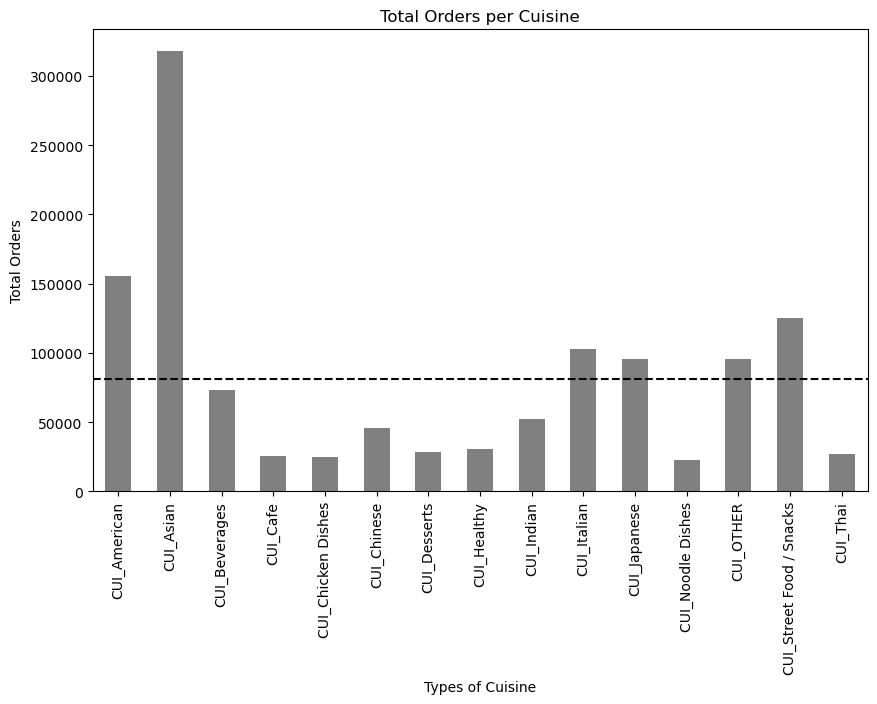

In [16]:
average_orders_cuisine = orders_per_cuisine_sum.mean()

plt.figure(figsize=(10, 6))
orders_per_cuisine_sum.plot(kind='bar', color = 'grey')
plt.axhline(y=average_orders_cuisine, color='black', linestyle='--', label='Average Orders')
plt.title('Total Orders per Cuisine')
plt.xlabel('Types of Cuisine')
plt.ylabel('Total Orders')

plt.show()

### Cuisines - Remarks
- On average, each type of cuisine is ordered about 81427 times. However, the graph reveals clear disparities among cuisines.
- Asian cuisine stands out as the one ordered the most, with an unexpectedly large gap between it and the second most popular, American cuisine. Following these, Street Food / Snacks ranks as the third most ordered.
- The least ordered cuisines are Cafe, Chicken Dishes, Noodle Dishes and Thai. While the other cuisines have order counts closer to the mean.

In [17]:
####### fiz correlation matrix com days of the week, moments of the day e cuisine mas nenhuma é highly correlated - deixo? ###########

# Non Metric Data

In [18]:
non_metric_features = df_non_metric.columns.to_list()

In [19]:
df_non_metric.head(5)

,customer_id,customer_region,last_promo,payment_method
0,1b8f824d5e,2360,DELIVERY,DIGI
1,5d272b9dcb,8670,DISCOUNT,DIGI
2,f6d1b2ba63,4660,DISCOUNT,CASH
3,180c632ed8,4660,DELIVERY,DIGI
4,4eb37a6705,4660,-,DIGI


In [20]:
# customer id is not needed for the analysis
#df_non_metric.drop(['customer_id'], axis=1, inplace=True)

In [21]:
df_non_metric = df_non_metric.replace('-', np.nan)

Basic Statistics

In [22]:
cat_stats_list = []

for col in df_non_metric.columns:
    tmp_dict = {
        'column': col,
        'values': df_non_metric[col].unique(),
        'values_count': len(df_non_metric[col].unique()),
        'values_count_nona': int(df_non_metric[col].nunique()),
        'mode': df_non_metric[col].mode().values[0],
        'num_miss': df_non_metric[col].isnull().sum(),
        'pct_miss': (df_non_metric[col].isnull().sum() / len(df_non_metric)).round(2) * 100
    }
    
    cat_stats_list.append(tmp_dict)

ds_cat_stats = pd.DataFrame(cat_stats_list)
ds_cat_stats


,column,values,values_count,values_count_nona,mode,num_miss,pct_miss
0,customer_id,"[1b8f824d5e, 5d272b9dcb, f6d1b2ba63, 180c632ed...",31875,31875,06018a56be,0,0.0
1,customer_region,"[2360, 8670, 4660, 2440, nan, 4140, 2490, 8370...",9,8,8670,442,1.0
2,last_promo,"[DELIVERY, DISCOUNT, nan, FREEBIE]",4,3,DELIVERY,16748,53.0
3,payment_method,"[DIGI, CASH, CARD]",3,3,CARD,0,0.0


- customer_region has a lot of different categories (8)
- More than half of last_promo values are missing - probably didn't use any discount
- Is DIGI payment method useful?

Frequency Distribution

- Certain regions order a lot more than others (unbalanced)
- Last Promotion used is balanced
- Card is used much more than the other (unbalanced)

In [23]:
# Import necessary libraries
import pandas as pd

# Iterate through the non-metric columns and print their frequency tables with percentages
for column in df_non_metric.columns:
    print(f"Frequency Table for {column}:")
    freq_table = df_non_metric[column].value_counts()  # Get the frequency count
    percentage_table = (df_non_metric[column].value_counts(normalize=True) * 100).round(2)  # Get the percentage
    
    # Combine frequency and percentage in one DataFrame for better presentation
    freq_percentage_table = pd.DataFrame({'Frequency': freq_table, 'Percentage (%)': percentage_table})
    
    print(freq_percentage_table)
    print("\n")  # Add space between the tables for better readability

Frequency Table for customer_id:
             Frequency  Percentage (%)
customer_id                           
742ca068fc           2            0.01
b55012ee1c           2            0.01
df91183978           2            0.01
6bbf5f74cd           2            0.01
24251eb7da           2            0.01
201a13a34d           2            0.01
b8e7a643a4           2            0.01
cc08ef25ce           2            0.01
8aa9bbc147           2            0.01
671bf0c738           2            0.01
06018a56be           2            0.01
fac7984c0d           2            0.01
cf563a0a98           2            0.01
acd18272ef           1            0.00
ea7f93ec2b           1            0.00
fc1a354c8b           1            0.00
f9d8ac2b15           1            0.00
f24a950655           1            0.00
b1353268e7           1            0.00
f249006bd1           1            0.00
eddd212be2           1            0.00
84f1a324c0           1            0.00
4f12efda90           1         

## Bivariate and Multivariate Analysis

What can be interesting to plot?

-> Customer age distribution per region - split customers, which regions ar younger? Average age per region

  customer_region  customer_age
7            8550     25.000000
0               -     27.095455
3            2490     27.194064
1            2360     27.474620
8            8670     27.514929
5            4660     27.525177
2            2440     27.633793
4            4140     27.650299
6            8370     27.708678


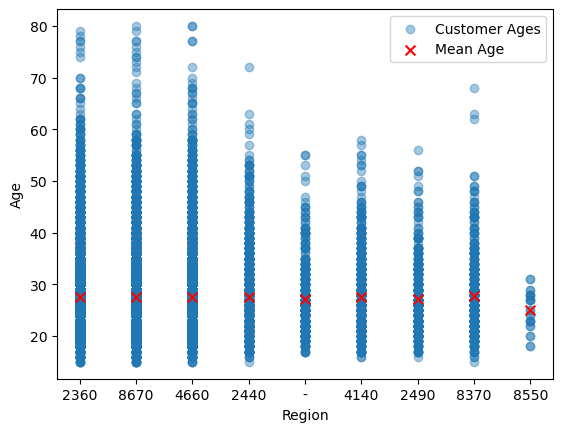

In [24]:
mean_ages_per_region = df.groupby('customer_region')['customer_age'].mean().reset_index()
print(mean_ages_per_region.sort_values(by='customer_age'))

plt.scatter(df["customer_region"], df["customer_age"], alpha=0.4, label='Customer Ages')
plt.ylabel("Age")
plt.xlabel("Region")

plt.scatter(mean_ages_per_region["customer_region"], mean_ages_per_region["customer_age"], color='red', marker='x', s=50, label='Mean Age')

plt.legend()
plt.show()

-> Vendor count per customer region & Vendor count per customer age - might tell us the customers that are more open to try different restaurants

  customer_region  vendor_count
4            4140      1.803967
6            8370      2.143434
0               -      2.821267
5            4660      2.826492
7            8550      2.846154
8            8670      2.906874
3            2490      3.312360
2            2440      3.696561
1            2360      3.702005


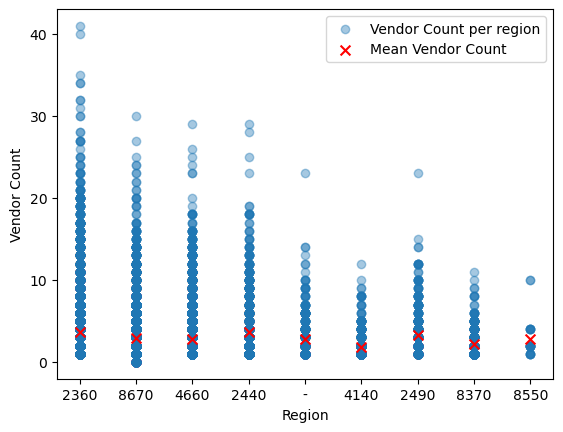

In [42]:
vendor_per_region = df.groupby('customer_region')['vendor_count'].mean().reset_index()
print(vendor_per_region.sort_values(by='vendor_count'))

plt.scatter(df["customer_region"], df["vendor_count"], alpha=0.4, label='Vendor Count per region')
plt.ylabel("Vendor Count")
plt.xlabel("Region")

plt.scatter(vendor_per_region["customer_region"], vendor_per_region["vendor_count"], color='red', marker='x', s=50, label='Mean Vendor Count')

plt.legend()
plt.show()

### Remarks
- Even though the difference is not immense, the two oldest regions have a tendency to be more conservative in their choices of vendors, not beting as much in variety.
- The regions starting with a '2' (2490, 2440, 2360), are clearly **varying more than others**, might they be close to each other or related in any other way? (the data was collected from three cities, is the initial number representing this?)
- Vendor count seems to be more correlated with region than with age

-> Heatmap of Cuisines by Region  - identify regional cuisine preferences using the frequency or average count of each cuisine type by region

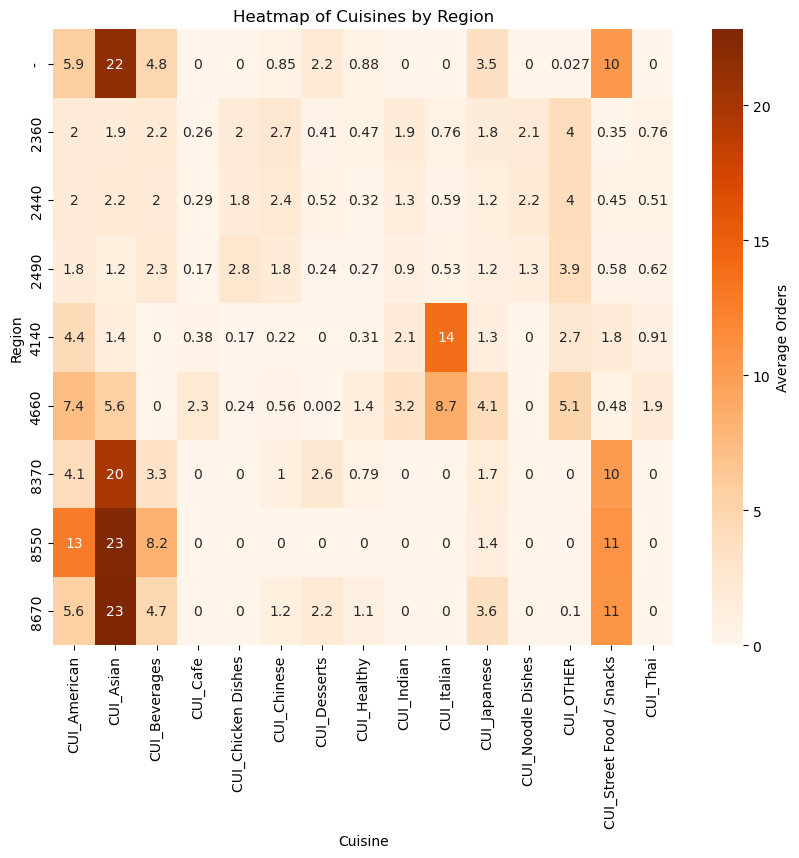

In [39]:
cuisine_per_region = df.groupby('customer_region')[orders_per_cuisine.columns.tolist()].mean()

plt.figure(figsize=(10, 8))  
sns.heatmap(cuisine_per_region, annot=True, cmap="Oranges", cbar_kws={'label': 'Average Orders'})

plt.title('Heatmap of Cuisines by Region')
plt.xlabel('Cuisine')
plt.ylabel('Region')

plt.show()

### Remarks
- Customers in the **'2' regions** seem to have a lot of options and enjoy diversifying, evidence of this is the fact that all cuisine types have non-null values for average orders but still, this values are **uniformly medium to low**; Despite this behavior, it is still possible to spot preferences, being 'CUI_OTHER' the overall favorite in the 3 regions of the group, followed by 'CUI_Chinese'; On the other side, 'CUI_Cafe', 'CUI_Desserts' and 'CUI_Street Food/Snacks' seem to be the overall least favorites in the region. Yet another remark can be taken from analysing the heatmap - from all 3 regions constituting the '2' regions group, one stands out as the most distinct in tastes, '2490', specially differing from '2360', while '2440' seems to be in between, leaning more towards the second. <br/>
- Customers in the **'4' regions** top 3 cuisines seem to be 'CUI_Italian', 'CUI_American' and 'CUI_OTHER'. Overall, the region '4660' seems to enjoy more diversity. Both 'CUI_Beverages' and 'CUI_Noodle Dishes' have null values of average orders, which may indicate that these options are not available in the region or that customers don't order from these categories. <br/>
- Customers in the **'8' regions** show clear favoritism towards 'CUI_Asian' and CUI_Street Food/Snacks', and a slight preference for 'CUI_American' and 'CUI_Beverages'. There are a lot of null values of average orders, which may indicate that these options are not available in the region or that customers don't order from these categories, with the region '8550' presenting the most null values (may indicate lack of oppeness to diversifying or less availability of options).
- Customers in the **'-' region** seem to have **very similar preferences to the ones of the '8' regions**, and more specifically with customers from '8670', presenting the same favorites and null values.
